In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [25]:
import os
import shutil
import pandas as pd

csv_path = "train.csv"
img_dir = "images/train"
output_dir = "images/train_separated"

df = pd.read_csv(csv_path)

for _, row in df.iterrows():
    # make sure both are strings
    img_name = str(row["id"])       # if your file is like "1234.jpg", see note below
    label = str(row["label"])       # convert int label to string for folder name

    src_path = os.path.join(img_dir, img_name)

    # OPTIONAL: if your CSV has id like 1234 but files are "1234.jpg", use:
    # img_name = f"{row['id']}.jpg"
    # src_path = os.path.join(img_dir, img_name)

    class_dir = os.path.join(output_dir, label)
    os.makedirs(class_dir, exist_ok=True)

    dst_path = os.path.join(class_dir, img_name)
    shutil.copy2(src_path, dst_path)   # or shutil.move(src_path, dst_path)


In [36]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
from torchvision import transforms

test_csv_path = "test.csv"
test_img_dir = "images/test"

test_df = pd.read_csv(test_csv_path)

test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

class TestDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_id = row["id"]

        # CASE 1: if filenames are like "123.jpg"
        filename = img_id   # or .png depending
        # CASE 2: if "id" already contains extension, just do:
        # filename = img_id

        path = os.path.join(self.img_dir, filename)
        image = Image.open(path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, img_id   # img_id to keep track in submission


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
train_transforms = transforms.Compose(
    [
        transforms.RandomRotation(45),
        transforms.RandomHorizontalFlip(),
        transforms.RandomAutocontrast(),
       transforms.ToTensor(),
       transforms.Resize((128, 128)),
    ]
)
dataset_train = ImageFolder(
    "images/train_separated",
    transform=train_transforms
)

FileNotFoundError: Couldn't find any class folder in images/test.

In [27]:
dataloader_train = DataLoader(
    dataset_train,
    shuffle=True,
    batch_size=32,
)
image, label = next(iter(dataloader_train))
print(image.shape)

torch.Size([32, 3, 128, 128])


In [29]:
image = images[0]
image = image.permute(1,2,0)
print(image.shape)

torch.Size([128, 128, 3])


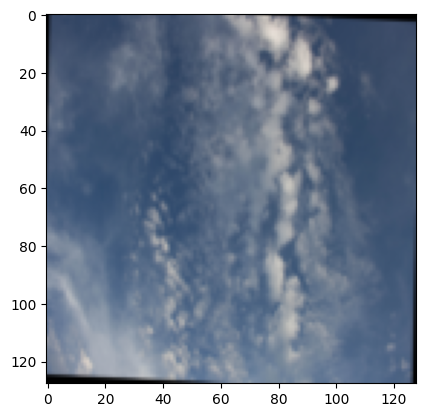

In [30]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [31]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        #convolution filter block1
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=32,
            kernel_size=3
        )
        self.pool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        #convolution filter block 2
        self.conv2 = nn.Conv2d(
            32,64,3
        )
        self.fc1 = nn.Linear(64*30*30, 128)
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [32]:
model = SimpleCNN(num_classes=7)
dummy = torch.randn(15,3,128,128)
out = model(dummy)
print(out.shape)

torch.Size([15, 7])


In [33]:
##Training Loops:
model = SimpleCNN(num_classes=7)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
total_steps = len(dataloader_train)
for epoch in range(10):
    model.train()
    running_loss = 0.0
    for step, (images, labels) in enumerate(dataloader_train, start=1):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"Epoch {epoch+1} | Step {step}/{total_steps}")

    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, loss = {epoch_loss:.4f}")

Epoch 1 | Step 1/30
Epoch 1 | Step 2/30
Epoch 1 | Step 3/30
Epoch 1 | Step 4/30
Epoch 1 | Step 5/30
Epoch 1 | Step 6/30
Epoch 1 | Step 7/30
Epoch 1 | Step 8/30
Epoch 1 | Step 9/30
Epoch 1 | Step 10/30
Epoch 1 | Step 11/30
Epoch 1 | Step 12/30
Epoch 1 | Step 13/30
Epoch 1 | Step 14/30
Epoch 1 | Step 15/30
Epoch 1 | Step 16/30
Epoch 1 | Step 17/30
Epoch 1 | Step 18/30
Epoch 1 | Step 19/30
Epoch 1 | Step 20/30
Epoch 1 | Step 21/30
Epoch 1 | Step 22/30
Epoch 1 | Step 23/30
Epoch 1 | Step 24/30
Epoch 1 | Step 25/30
Epoch 1 | Step 26/30
Epoch 1 | Step 27/30
Epoch 1 | Step 28/30
Epoch 1 | Step 29/30
Epoch 1 | Step 30/30
Epoch 1, loss = 1.9612
Epoch 2 | Step 1/30
Epoch 2 | Step 2/30
Epoch 2 | Step 3/30
Epoch 2 | Step 4/30
Epoch 2 | Step 5/30
Epoch 2 | Step 6/30
Epoch 2 | Step 7/30
Epoch 2 | Step 8/30
Epoch 2 | Step 9/30
Epoch 2 | Step 10/30
Epoch 2 | Step 11/30
Epoch 2 | Step 12/30
Epoch 2 | Step 13/30
Epoch 2 | Step 14/30
Epoch 2 | Step 15/30
Epoch 2 | Step 16/30
Epoch 2 | Step 17/30
Epoch 2 

In [37]:
test_dataset = TestDataset(test_df, test_img_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [38]:

model.eval()
all_ids = []
all_preds = []
with torch.no_grad():
    for test_images, img_ids in test_loader:
        output = model(test_images)
        preds = output.argmax(dim=1)
        all_ids.extend(img_ids)
        all_preds.extend(preds.cpu().numpy())




In [39]:
import pandas as pd

submission = pd.DataFrame({
    "id": all_ids,
    "predict": all_preds     # or map index -> class name
})

submission.to_csv("submission.csv", index=False)
print("Saved submission.csv")


Saved submission.csv
